## Time Series Analysis and Forecasting
### Assignment 03

Consider the Copper datasets in StatsModels.<br>
Train an appropriate model to forecast the consumption based on price, income index and aluminium price(alternative to copper)

In [2]:
import numpy as np 
import pandas as pd

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

# import chart_studio.plotly as py
#import cufflinks as cf
import plotly.express as px

In [11]:
copper_df = sm.datasets.copper.load_pandas().data

In [12]:
copper_df.head(5)

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0


In [13]:
copper_df.isnull().sum()

WORLDCONSUMPTION    0
COPPERPRICE         0
INCOMEINDEX         0
ALUMPRICE           0
INVENTORYINDEX      0
TIME                0
dtype: int64

<AxesSubplot:title={'center':'Aluminium Price'}>

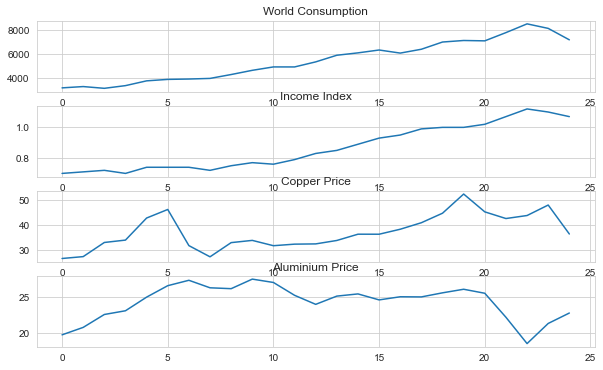

In [23]:
fig, ax = plt.subplots(4,1, figsize = (10,6))

copper_df.WORLDCONSUMPTION.plot(ax = ax[0], title = 'World Consumption')
copper_df.INCOMEINDEX.plot(ax = ax[1], title = 'Income Index')
copper_df.COPPERPRICE.plot(ax = ax[2],title = 'Copper Price' )

copper_df.ALUMPRICE.plot(ax = ax[3], title = 'Aluminium Price')




In [36]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller



In [37]:
selected_cols = ['WORLDCONSUMPTION','INCOMEINDEX', 'COPPERPRICE', 'ALUMPRICE']

for i in selected_cols:
    ad_fuller_result_1 = adfuller(copper_df[i])#.diff()[1:])
    print('Stationarity check', i)
    print(f'ADF Statistic: {ad_fuller_result_1[0]}')
    print(f'p-value: {ad_fuller_result_1[1]}')
    print('---------------------')


Stationarity check WORLDCONSUMPTION
ADF Statistic: -1.7272366672124813
p-value: 0.4171367679344
---------------------
Stationarity check INCOMEINDEX
ADF Statistic: -0.5895485006360016
p-value: 0.8733261921087185
---------------------
Stationarity check COPPERPRICE
ADF Statistic: -2.379918835458598
p-value: 0.1474845632619904
---------------------
Stationarity check ALUMPRICE
ADF Statistic: 0.19929226811340928
p-value: 0.9722218714633613
---------------------


In [32]:
selected_cols = ['INCOMEINDEX', 'COPPERPRICE', 'ALUMPRICE']

for i in selected_cols:
    print('------------------')
    list_combo = ['WORLDCONSUMPTION', i ]
    print(i, 'Granger Causes World Consumption of Copper')
    granger_1 = grangercausalitytests(copper_df[list_combo], 4)

------------------
INCOMEINDEX Granger Causes World Consumption of Copper

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0021  , p=0.9643  , df_denom=21, df_num=1
ssr based chi2 test:   chi2=0.0023  , p=0.9614  , df=1
likelihood ratio test: chi2=0.0023  , p=0.9614  , df=1
parameter F test:         F=0.0021  , p=0.9643  , df_denom=21, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1655  , p=0.3342  , df_denom=18, df_num=2
ssr based chi2 test:   chi2=2.9786  , p=0.2255  , df=2
likelihood ratio test: chi2=2.8009  , p=0.2465  , df=2
parameter F test:         F=1.1655  , p=0.3342  , df_denom=18, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2781  , p=0.3178  , df_denom=15, df_num=3
ssr based chi2 test:   chi2=5.6236  , p=0.1314  , df=3
likelihood ratio test: chi2=5.0078  , p=0.1712  , df=3
parameter F test:         F=1.2781  , p=0.3178  , df_denom=15, df_num=3

Granger Causality
number 

In [39]:
#Checking for Granger Causality of the World consumption on the Aluminium Price

selected_cols = ['ALUMPRICE']

for i in selected_cols:
    print('------------------')
    list_combo = [i , 'WORLDCONSUMPTION']
    print('World Consumption of Copper, Granger Causes' , i)
    granger_1 = grangercausalitytests(copper_df[list_combo], 4)

------------------
World Consumption of Copper, Granger Causes ALUMPRICE

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8491  , p=0.1062  , df_denom=21, df_num=1
ssr based chi2 test:   chi2=3.2561  , p=0.0712  , df=1
likelihood ratio test: chi2=3.0534  , p=0.0806  , df=1
parameter F test:         F=2.8491  , p=0.1062  , df_denom=21, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1443  , p=0.1461  , df_denom=18, df_num=2
ssr based chi2 test:   chi2=5.4799  , p=0.0646  , df=2
likelihood ratio test: chi2=4.9152  , p=0.0856  , df=2
parameter F test:         F=2.1443  , p=0.1461  , df_denom=18, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6873  , p=0.0838  , df_denom=15, df_num=3
ssr based chi2 test:   chi2=11.8240 , p=0.0080  , df=3
likelihood ratio test: chi2=9.4628  , p=0.0237  , df=3
parameter F test:         F=2.6873  , p=0.0838  , df_denom=15, df_num=3

Granger Causality
number o

#### Based on the Granger Causality Tests, we can establish a causal relationship between World Consumption of Copper and Aluminium Price. It should be noted that it appears odd that there is no Granger causality between Copper Consumption and Copper Price

In [41]:
# Shortlist the columns for the VAR Modelling

copper_df_var = copper_df[['WORLDCONSUMPTION', 'ALUMPRICE']]

In [42]:
copper_df_var.head()

,WORLDCONSUMPTION,ALUMPRICE
0,3173.0,19.76
1,3281.1,20.78
2,3135.7,22.55
3,3359.1,23.06
4,3755.1,24.93


In [43]:
copper_df_var.shape

(25, 2)

In [44]:
train_df=copper_df_var[:19]
test_df=copper_df_var[19:]

In [46]:
train_df.shape

(19, 2)

In [47]:
test_df.shape

(6, 2)

In [48]:
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR

In [49]:
var_model_copper = VAR(train_df[1:])

In [54]:
# Identify model order 
sorted_order=var_model_copper.select_order(maxlags=5)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       13.56       13.65   7.750e+05       13.54
1       11.04       11.30   6.320e+04       10.98
2       11.00       11.44   6.536e+04       10.91
3       10.50       11.11   4.692e+04       10.38
4       9.378       10.16   2.244e+04       9.218
5      7.391*      8.347*      7916.*      7.195*
-------------------------------------------------


In [57]:
#after identifying the lags, we use the VARMAX 

var_model_copper_2 = VARMAX(train_df[1:], order = (5,0), enforce_stationarity = True).fit()

print(var_model_copper_2.summary())

                                   Statespace Model Results                                  
Dep. Variable:     ['WORLDCONSUMPTION', 'ALUMPRICE']   No. Observations:                   18
Model:                                        VAR(5)   Log Likelihood                -155.719
                                         + intercept   AIC                            361.438
Date:                               Sat, 03 Dec 2022   BIC                            383.697
Time:                                       13:31:45   HQIC                           364.507
Sample:                                            0                                         
                                                - 18                                         
Covariance Type:                                 opg                                         
Ljung-Box (L1) (Q):             0.39, 0.28   Jarque-Bera (JB):          2.61, 10.50
Prob(Q):                        0.53, 0.60   Prob(JB):                

#### It appears that instead of a two way relationship, only a one way relationship should have been considered. (Aluminium Price causing World Consumption). Hence we would discard the VAR model and choose a unidirectional causal model (ARIMAX or SARIMAX)

#### Checking if the data has seasonality via the STL decomposition

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

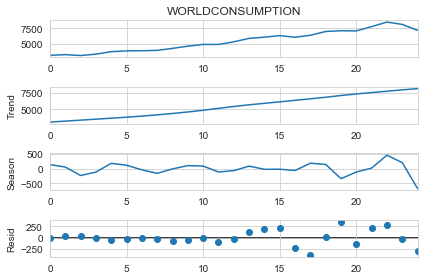

In [64]:
stl = STL(copper_df_var.WORLDCONSUMPTION, period=5).fit()
fig = stl.plot()

#### Due to changing seasonality, we would choose SARIMAX (Seasonal ARIMA + Exogenous variable)

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

##### The orders for the ARIMA component can be chosen from the results of the previous model (even though it has been discarded). But the orders of the S (seasonality) component can be determined by the ACF / PACF plots on the Seasonality determined from the STL decomposition

https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

In [76]:
stl.seasonal.head()

0    136.727603
1     55.997920
2   -231.313473
3   -115.823691
4    180.792279
Name: season, dtype: float64

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

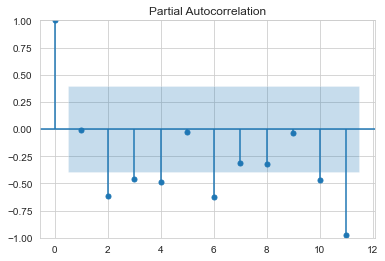

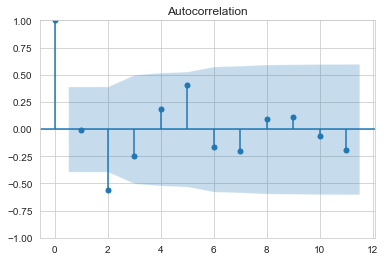

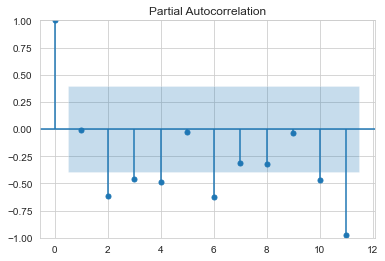

In [83]:
plot_acf(stl.seasonal, lags = 11)
plot_pacf(stl.seasonal, lags = 11)

#### For the Seasonal Component, choosing The AR term (P) as 6 and the MA term (Q) as 2.

In [113]:
y = copper_df.WORLDCONSUMPTION
X = copper_df.ALUMPRICE 

model_sarimax_unfitted = SARIMAX(y, order=(0, 0, 0), trend="t", seasonal_order=(2, 0, 2, 2)) 
#Since 4 lags gave us significant results                                                                                          
# No differencing as data already stationary
# And it is linear trend
# Seasonal P,D,Q chosen based on the ACF / PACF plots of the seasonality

model_sarimax_fitted = model_sarimax_unfitted.fit(y, X)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### Due to the above error, making the P,D,Q of the seasonal component to zero

In [115]:
y = copper_df.WORLDCONSUMPTION
x = copper_df.ALUMPRICE 

model_sarimax_unfitted = SARIMAX(y,x, order=(2, 1, 0), trend="t", seasonal_order=(0, 0, 0, 0)) 
#Since 4 lags gave us significant results                                                                                          
# 1 Difference order
# And it is a linear trend

model_sarimax_fitted = model_sarimax_unfitted.fit()

model_sarimax_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -169.685
Date:                Sat, 03 Dec 2022   AIC                            349.369
Time:                        14:52:15   BIC                            355.259
Sample:                             0   HQIC                           350.932
                                 - 25                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         13.1219      7.538      1.741      0.082      -1.653      27.897
ALUMPRICE    -36.8088     65.038     -0.566      0.571    -164.282      90.664
ar.L1          0.4340      0.353      1.228      0.219      -0.259       1.127
ar.L2         -0.6483      0.303     -2.143      0.032      -1.241      -0.055
sigma2      7.562e+04   3.04e+04      2.484      0.013     1.6e+04    1.35e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                 7.29
Prob(Q):                              0.52   Prob(JB):                         0.03
Heteroskedasticity (H):               3.51   Skew:                            -1.22
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
#Testing by reducting the number of lags to 0
y = copper_df.WORLDCONSUMPTION
x = copper_df.ALUMPRICE 

model_sarimax_unfitted = SARIMAX(y,x, order=(0, 0, 0), trend="t", seasonal_order=(0, 0, 0, 0)) 
#Since 4 lags gave us significant results                                                                                          
# 1 Difference order
# And it is a linear trend

model_sarimax_fitted = model_sarimax_unfitted.fit()

model_sarimax_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:                        SARIMAX   Log Likelihood                -190.014
Date:                Sat, 03 Dec 2022   AIC                            386.027
Time:                        14:52:52   BIC                            389.684
Sample:                             0   HQIC                           387.041
                                 - 25                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift        236.4744      9.731     24.300      0.000     217.401     255.548
ALUMPRICE    104.9966      7.762     13.527      0.000      89.783     120.210
sigma2      2.341e+05   6.42e+04      3.648      0.000    1.08e+05     3.6e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.13   Jarque-Bera (JB):                 2.61
Prob(Q):                              0.02   Prob(JB):                         0.27
Heteroskedasticity (H):               1.58   Skew:                             0.74
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Attempting the solution via ARIMAX as well

In [103]:
from statsmodels.tsa.arima.model import ARIMA

In [107]:
y = copper_df.WORLDCONSUMPTION
x = copper_df.ALUMPRICE 

model_arimax_unfitted = ARIMA(y, exog=x, order=(4, 1, 0), trend="t", seasonal_order=(0, 0, 0, 0)) 
#Since 4 lags gave us significant results                                                                                          
# 1 Difference order
# And it is a linear trend

model_arimax_fitted = model_arimax_unfitted.fit()

model_arimax_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -164.873
Date:                Sat, 03 Dec 2022   AIC                            343.747
Time:                        14:40:27   BIC                            351.993
Sample:                             0   HQIC                           345.934
                                 - 25                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift        171.8922    116.185      1.479      0.139     -55.826     399.611
ALUMPRICE    -99.8967     51.088     -1.955      0.051    -200.027       0.233
ar.L1          0.3720      0.463      0.803      0.422      -0.536       1.280
ar.L2         -0.4265      0.359     -1.188      0.235      -1.130       0.277
ar.L3          0.0261      0.289      0.090      0.928      -0.540       0.592
ar.L4          0.3611      0.410      0.881      0.378      -0.442       1.164
sigma2      5.094e+04   2.42e+04      2.102      0.036    3451.224    9.84e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.08
Prob(Q):                              0.98   Prob(JB):                         0.01
Heteroskedasticity (H):               7.16   Skew:                            -1.31
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Since the autoregressive components are not significant, dropping them and retraining the model

In [121]:
y = copper_df.WORLDCONSUMPTION
x = copper_df.ALUMPRICE 

model_arimax_unfitted_no_ar = ARIMA(y, exog=x, order=(0, 1, 0), trend="t", seasonal_order=(0, 0, 0, 0)) 
#Since 4 lags gave us significant results                                                                                          
# 1 Difference order
# And it is a linear trend

model_arimax_fitted_no_ar = model_arimax_unfitted_no_ar.fit()

model_arimax_fitted_no_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -171.794
Date:                Sat, 03 Dec 2022   AIC                            349.589
Time:                        14:54:11   BIC                            353.123
Sample:                             0   HQIC                           350.526
                                 - 25                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift        180.4033     85.314      2.115      0.034      13.190     347.616
ALUMPRICE   -115.5449     57.943     -1.994      0.046    -229.110      -1.979
sigma2      9.658e+04   2.35e+04      4.113      0.000    5.06e+04    1.43e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):                 7.08
Prob(Q):                              0.45   Prob(JB):                         0.03
Heteroskedasticity (H):               4.33   Skew:                            -0.97
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Thus the below model satisfies the statistical tests. Thank you
model_arimax_fitted_no_ar